<a href="https://colab.research.google.com/github/Haritch-6509650757/Face_Recognition/blob/image_augmentation/image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow albumentations numpy matplotlib

<ipython-input-13-087ab616acc1>:53: DeprecationWarning: Flip is deprecated. Consider using HorizontalFlip, VerticalFlip, RandomRotate90 or D4.
  flip_augmenter = A.Flip(p=1.0)


Saved 225 augmented images to /content/augmented images V.1
Total number of augmented images: 225
Expected number of augmented images: 225
Actual number of files in folder: 225
All augmented images are saved correctly!


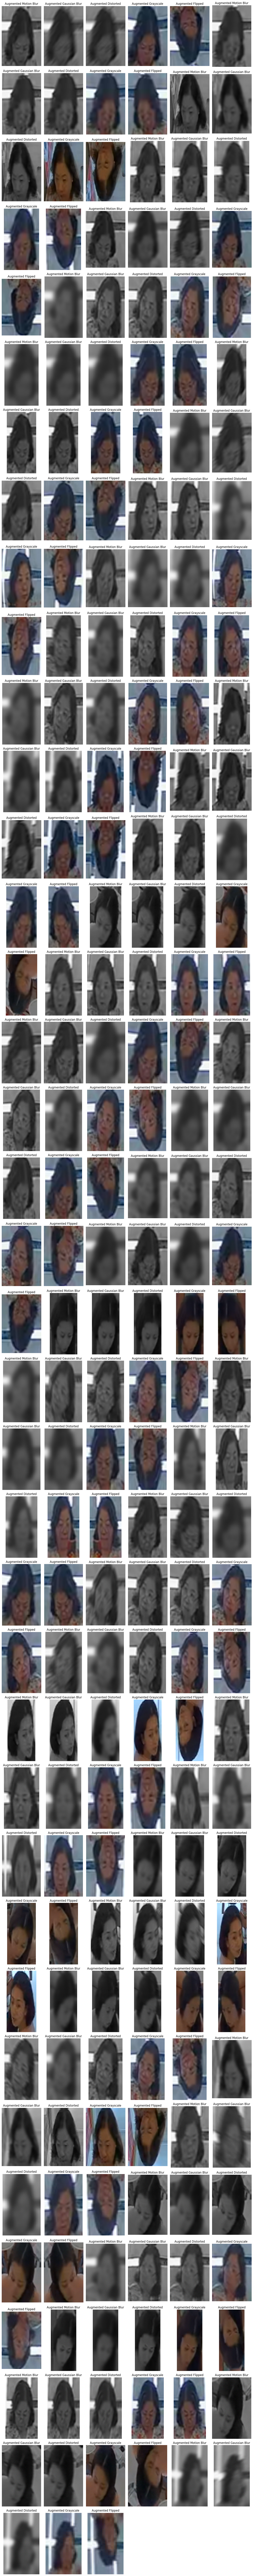

In [13]:
import os
from PIL import Image
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

# Function to load all images from a folder
def load_images_from_folder(folder_path):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert("RGB")
            images.append(np.array(img))  # เก็บภาพใน NumPy array
            filenames.append(filename)
    return images, filenames

# Function to save augmented images
def save_augmented_images(augmented_images, filenames, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    augmented_count = 0

    for i, aug_img in enumerate(augmented_images):

        augmented_filename = f"augmented_{filenames[i % len(filenames)]}_aug_{i}.png"
        save_path = os.path.join(save_dir, augmented_filename)

        Image.fromarray(aug_img).save(save_path)  # บันทึกภาพ
        augmented_count += 1
    print(f"Saved {augmented_count} augmented images to {save_dir}")

# Function to check the number of files in the folder
def check_number_of_files(folder_path, expected_count):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    actual_count = len(files)
    print(f"Expected number of augmented images: {expected_count}")
    print(f"Actual number of files in folder: {actual_count}")
    return actual_count == expected_count

# Define augmentation pipeline
augmenter = A.Compose([
    A.OneOf([
        A.MotionBlur(blur_limit=15, p=1.0),
        A.GaussianBlur(blur_limit=(15, 25), p=1.0),
        A.OpticalDistortion(distort_limit=0.3, shift_limit=0.2, p=1.0),
    ], p=1.0),
    A.ToGray(p=1.0),
])

# Augment separately for distortion and flip
distort_augmenter = A.OpticalDistortion(distort_limit=0.3, shift_limit=0.2, p=1.0)
flip_augmenter = A.Flip(p=1.0)

# Paths
input_folder = "/content/images V.1 "  # โฟลเดอร์ต้นฉบับ
output_folder = "/content/augmented images V.1"  # โฟลเดอร์สำหรับผลลัพธ์

# Load images
images, filenames = load_images_from_folder(input_folder)

# Define augmentation names
augmentation_names = ["Motion Blur", "Gaussian Blur", "Distorted", "Grayscale", "Flipped"]

# Perform augmentation
augmented_images = []

for image in images:
    augmented_set = []  # กำหนดตัวแปร `augmented_set` ภายในลูป

    # Apply main augmentation
    for _ in range(3):
        augmented = augmenter(image=image)
        augmented_set.append(augmented["image"])

    # Apply distortion augmentation
    distorted_image = distort_augmenter(image=image)["image"]
    augmented_set.append(distorted_image)

    # Apply flip augmentation
    flipped_image = flip_augmenter(image=image)["image"]
    augmented_set.append(flipped_image)

    augmented_images.extend(augmented_set)  # รวมภาพทั้งหมดที่ augment ไว้

# Save augmented images
save_augmented_images(augmented_images, filenames * len(augmented_set), output_folder)

# Count the number of augmented images
num_augmented_images = len(augmented_images)
print(f"Total number of augmented images: {num_augmented_images}")

# Check if the number of files in the folder matches the expected count
if check_number_of_files(output_folder, num_augmented_images):
    print("All augmented images are saved correctly!")
else:
    print("There seems to be an issue with saving all augmented images.")

# Display original and augmented images
# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(augmented_images) / 6))

plt.figure(figsize=(15, num_rows * 4))

# Display original and augmented images with titles
for i, aug_img in enumerate(augmented_images):
    plt.subplot(num_rows, 6, i + 1)
    plt.imshow(aug_img)
    plt.title(f"Augmented {augmentation_names[i % len(augmentation_names)]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
